In [63]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [64]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif)

# Functions

In [65]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [66]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [67]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [68]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [69]:
meta_div <- meta_div[ !is.na(meta_div$CD3), ]

In [70]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]
meta_div <- meta_div[ meta_div$cancergroup != "LFS", ]

Exclude T-ALLs

In [72]:
table(meta_div$Disease_type)


  ALCL    ALL    AML   ARMS     BL    BLL    CML  DLBCL   ERMS    EWS     HB 
    14    143     69      7     26     13     25     20     31     40     25 
    HD HR ALL  MS NB     NB     OS  PMBCL    RMS SR ALL  T-ALL  WILMS 
    49     83      5     23     72     12     15     17     24     16 

In [73]:
meta_div <- meta_div[ meta_div$Disease_type != "T-ALL", ]

In [74]:
# meta_div$cancergroup[ which(meta_div$cancergroup == "Solid")] <- "Solid tumors"

In [75]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]

In [76]:
dim(pbmc)

[1] 443  64

In [77]:
# names(group_col)[ names(group_col) == "Solid"] <- "Solid tumors"

In [78]:
pbmc <- pbmc[ pbmc$CD3 > 0,]

ridgeplot

In [79]:
library(ggridges)

In [80]:
pbmc$cancergroup <- factor(pbmc$cancergroup, levels = c("Solid tumors", "Leukemia", "Lymphoma"))

In [81]:
ridgeplot.fx <- function(df, x, y, myfill, grids, myxlab){
    p <- ggplot(df, aes(x = eval(as.name(x)), y = eval(as.name(y)), fill = eval(as.name(myfill)))) +
  geom_density_ridges(alpha = 0.2, scale = 1, from = 0, to = 100) +
  theme_ridges(font_size = 13, grid = eval(grids)) + 
  theme(axis.title.y = element_blank(), legend.position = "none") + labs(x = myxlab)
  return(p)
}

In [82]:
# pTE <- ridgeplot.fx(pbmc, "percent_TE", "cycle", "cancergroup", "TRUE", "Percent TE")

In [83]:
# pEM <- ridgeplot.fx(pbmc, "percent_EM", "cycle", "cancergroup", "TRUE", "Percent EM")
# pCM <- ridgeplot.fx(pbmc, "percent_CM", "cycle", "cancergroup", "TRUE", "Percent CM")
# pSCM <- ridgeplot.fx(pbmc, "percent_SCM", "cycle", "cancergroup", "TRUE", "Percent SCM")
# pN <- ridgeplot.fx(pbmc, "percent_Naive", "cycle", "cancergroup", "TRUE", "Percent Naive")

In [84]:
library(cowplot)

In [85]:
# allp <- plot_grid(pN, pSCM, pCM, pEM, pTE, nrow = 1)

In [86]:
# pdf(paste0(plotpath, "Flow_overview.pdf"), width = 10, height = 4)
# allp
# dev.off()

one plot with facet so the plots align well

In [87]:
# melt
pbmc_m <- reshape2::melt(pbmc, id.vars = c("cancergroup", "cycle"), measure.vars = c("Naïve%", "SCM%", "CM%", "EM%", "TE%"))

In [88]:
myp <- ggplot(pbmc_m, aes(x = value, y = cycle, fill = cancergroup, point_color = cancergroup)) +
  geom_density_ridges(
    alpha = 0.4, from = 0, to = 100,
    scale = 1,
    panel_scaling = TRUE,
    quantile_lines = FALSE, size = 0.2,
    jittered_points = TRUE, point_shape = "|", point_size = 3, 
    position = position_points_jitter(height = 0)
  ) +
  geom_point(data=subset(pbmc_m, cancergroup %in% c("Lymphoma") & cycle %in% c("X04", "X05")), aes(),shape="|", size = 3) +
  theme_ridges(font_size = 13, grid = TRUE) +
  facet_wrap(~variable, nrow = 1, scales = "free_x", strip.position = "bottom") +
  theme(axis.title = element_blank(),
    legend.position = "bottom",
    strip.background.x = element_blank(),
    strip.placement = "outside"
  )


Picking joint bandwidth of 8.56

Picking joint bandwidth of 2.87

Picking joint bandwidth of 7.51

Picking joint bandwidth of 1.75

Picking joint bandwidth of 13.5



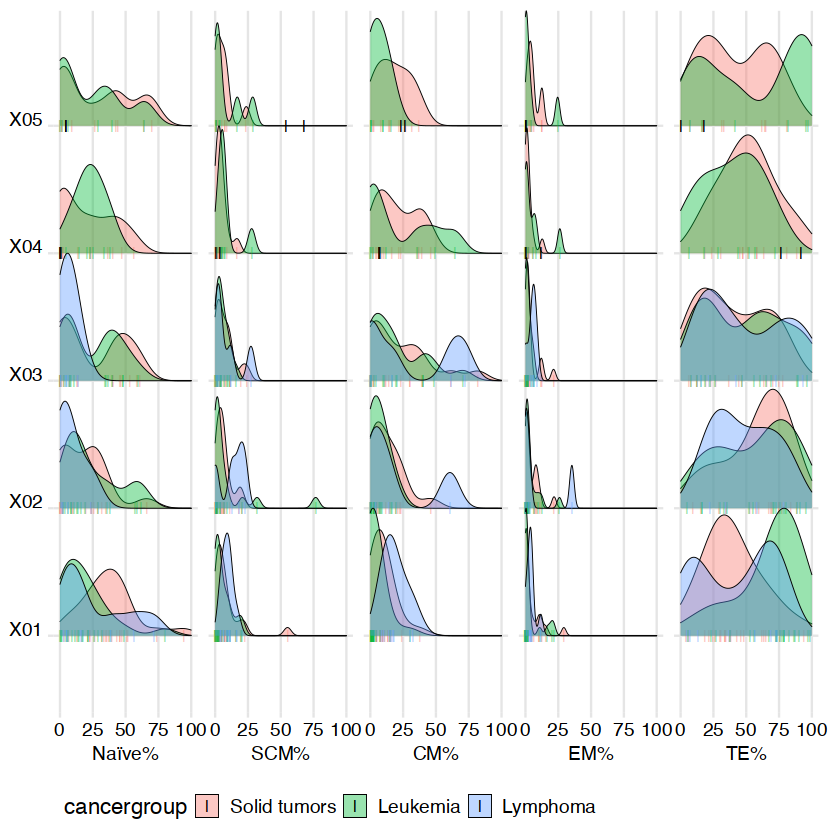

In [89]:
myp

In [90]:
pdf(paste0(plotpath, "Flow_overview.pdf"), width = 8, height = 4)
myp
dev.off()

Picking joint bandwidth of 8.56

Picking joint bandwidth of 2.87

Picking joint bandwidth of 7.51

Picking joint bandwidth of 1.75

Picking joint bandwidth of 13.5



pdf 
  2

In [91]:
library(ggh4x)
library(ggthemes)

In [92]:
pbmc_m_tcells <- pbmc_m
pbmc_m_tcells$type <- "T-cell subsets (Flow cytometry)"

In [93]:
myp <- ggplot(pbmc_m_tcells, aes(x = value, y = cycle, fill = cancergroup)) +
  geom_density_ridges(
    alpha = 0.4, from = 0, to = 100,
    scale = 1,
    panel_scaling = TRUE,
    quantile_lines = FALSE, size = 0.2,
    jittered_points = TRUE, point_shape = "|", point_size = 3,
    position = position_points_jitter(height = 0)
  ) +
  geom_point(data = subset(pbmc_m_tcells, cancergroup %in% c("Lymphoma") & cycle %in% c("X04", "X05")), aes(), shape = "|", size = 3) +
  #theme_ridges(font_size = 13, grid = TRUE) +
  facet_nested(cancergroup ~ type + variable, nest_line = element_line(linetype = 1), switch = "y", axes = "all", remove_labels = "all") +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(colour = "#7f7f7f2a"),
    panel.background = element_blank(),
    panel.spacing = unit(.5, "lines"),
    #panel.border = element_rect(color = "black", fill = NA, size = 1),
    panel.border = element_blank(),

    axis.title = element_blank(),
    axis.line = element_line(),

    legend.position = "none",

    strip.background = element_blank(),
    strip.placement = "outside",
    ggh4x.facet.nestline = element_line(colour = "black", linewidth = 0.3)
  )


In [94]:
pdf(paste0(plotpath, "Flow_overview_facet.pdf"), width = 10, height = 9)
myp
dev.off()

Picking joint bandwidth of 11.5

Picking joint bandwidth of 2.38

Picking joint bandwidth of 7.76

Picking joint bandwidth of 1.64

Picking joint bandwidth of 11.4

Picking joint bandwidth of 10

Picking joint bandwidth of 2.9

Picking joint bandwidth of 7.05

Picking joint bandwidth of 1.41

Picking joint bandwidth of 16.1

Picking joint bandwidth of 4.18

Picking joint bandwidth of 3.34

Picking joint bandwidth of 7.71

Picking joint bandwidth of 2.2

Picking joint bandwidth of 13.1



pdf 
  2

NCR

In [95]:
colnames(pbmc)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "TRB"                "Reads"             
[43] "CPKR"               "Average_reads"      "VMR"               
[46] "Max_reads"          "Singletons"         "Doubletons"        
[49] "qD"                 "Sample_Coverage"    "observed_Richness" 
[52] "estimated_Richness" "SE_Richeness"       "observed_Shannon"  
[55] "estimated_Shannon"  "SE_Shannon"         "observed_Simpson"  
[58] "estimated_Simpson"  "SE_Simpson"         "basename"          
[61] "file"               "Group"              "sampletype"        
[64] "log10shann"

In [96]:
# melt
pbmc_m <- reshape2::melt(pbmc, id.vars = c("cancergroup", "cycle"), measure.vars = c("PD1%", "LAG3%", "TIM3%"))

In [97]:
pbmc_m_ncr <- pbmc_m
pbmc_m_ncr$type <- "Exhaustion markers (Flow cytometry)"

for now, remove those missed entries till confirmed by DB, then add back in:

In [98]:
pbmc_m_ncr <- pbmc_m_ncr[ which(pbmc_m_ncr$value <= 100),]

In [99]:
myp <- ggplot(pbmc_m_ncr, aes(x = value, y = cycle, fill = cancergroup)) +
  geom_density_ridges(
    alpha = 0.4, from = 0, to = 100,
    scale = 1,
    panel_scaling = TRUE,
    quantile_lines = FALSE, size = 0.2,
    jittered_points = TRUE, point_shape = "|", point_size = 3,
    position = position_points_jitter(height = 0)
  ) +
  geom_point(data = subset(pbmc_m_ncr, cancergroup %in% c("Lymphoma") & cycle %in% c("X04", "X05")), aes(), shape = "|", size = 3) +
  #theme_ridges(font_size = 13, grid = TRUE) +
  facet_nested(cancergroup ~ type + variable, nest_line = element_line(linetype = 1), axes = "all", remove_labels = "all") +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(colour = "#7f7f7f2a"),
    panel.background = element_blank(),
    panel.spacing = unit(.5, "lines"),
    #panel.border = element_rect(color = "black", fill = NA, size = 1),
    panel.border = element_blank(),

    axis.title = element_blank(),
    axis.line = element_line(),

    legend.position = "none",

    strip.background = element_blank(),
    strip.placement = "outside",
    strip.text.y = element_blank(),
    ggh4x.facet.nestline = element_line(colour = "black", linewidth = 0.3)
  )


In [100]:
pdf(paste0(plotpath, "NCR_overview.pdf"), width = 6, height = 9)
myp
dev.off()

Picking joint bandwidth of 4.62

Picking joint bandwidth of 4.64

Picking joint bandwidth of 4.73

Picking joint bandwidth of 6.41

Picking joint bandwidth of 4.46

Picking joint bandwidth of 6.51

Picking joint bandwidth of 10.3

Picking joint bandwidth of 5.41

Picking joint bandwidth of 10.9



pdf 
  2

stats

In [101]:
pbmc$cancergroup <- as.character(pbmc$cancergroup)

In [102]:
colnames(pbmc)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "TRB"                "Reads"             
[43] "CPKR"               "Average_reads"      "VMR"               
[46] "Max_reads"          "Singletons"         "Doubletons"        
[49] "qD"                 "Sample_Coverage"    "observed_Richness" 
[52] "estimated_Richness" "SE_Richeness"       "observed_Shannon"  
[55] "estimated_Shannon"  "SE_Shannon"         "observed_Simpson"  
[58] "estimated_Simpson"  "SE_Simpson"         "basename"          
[61] "file"               "Group"              "sampletype"        
[64] "log10shann"

In [129]:
tmp <- pbmc[ pbmc$cycle == "X01", ]

In [134]:
tapply(tmp$`TIM3%`, tmp$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.6279  2.0488  4.2779  7.2807 10.9205 21.4610       2 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.18   16.84   24.05   38.20   30.10  152.22 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7637  5.1805  9.4737 11.2125 12.5997 47.6662 


In [135]:
mytest <- "TIM3%"
ks.test(tmp[[mytest]][ which(tmp$cancergroup == "Solid tumors")], tmp[[mytest]][ which(tmp$cancergroup == "Lymphoma")])
ks.test(tmp[[mytest]][ which(tmp$cancergroup == "Solid tumors")], tmp[[mytest]][ which(tmp$cancergroup == "Leukemia")])
ks.test(tmp[[mytest]][ which(tmp$cancergroup == "Lymphoma")], tmp[[mytest]][ which(tmp$cancergroup == "Leukemia")])


	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cancergroup == "Solid tumors")] and tmp[[mytest]][which(tmp$cancergroup == "Lymphoma")]
D = 0.80952, p-value = 0.000294
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cancergroup == "Solid tumors")] and tmp[[mytest]][which(tmp$cancergroup == "Leukemia")]
D = 0.4411, p-value = 0.0287
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cancergroup == "Lymphoma")] and tmp[[mytest]][which(tmp$cancergroup == "Leukemia")]
D = 0.73684, p-value = 0.001746
alternative hypothesis: two-sided


In [160]:
tmp <- pbmc[ pbmc$cancergroup == "Leukemia", ]

In [162]:
tapply(tmp$`LAG3%`, tmp$cycle, summary)

$X01
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.200   2.522   3.722   6.807  11.182  18.542       2 

$X02
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.595   4.045   8.158  10.002  13.783  24.611 

$X03
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.644   2.907   5.578  14.770  26.753  48.999 

$X04
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6907  5.8796 12.6514 17.1606 17.1088 60.8054 

$X05
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.103   7.199   8.237  13.443  10.245  41.314 


In [163]:
mytest <- "LAG3%"
ks.test(tmp[[mytest]][ which(tmp$cycle == "X01")], tmp[[mytest]][ which(tmp$cycle == "X02")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X01")], tmp[[mytest]][ which(tmp$cycle == "X03")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X01")], tmp[[mytest]][ which(tmp$cycle == "X04")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X01")], tmp[[mytest]][ which(tmp$cycle == "X05")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X02")], tmp[[mytest]][ which(tmp$cycle == "X03")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X02")], tmp[[mytest]][ which(tmp$cycle == "X04")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X02")], tmp[[mytest]][ which(tmp$cycle == "X05")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X03")], tmp[[mytest]][ which(tmp$cycle == "X04")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X03")], tmp[[mytest]][ which(tmp$cycle == "X05")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X04")], tmp[[mytest]][ which(tmp$cycle == "X05")])


	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X01")] and tmp[[mytest]][which(tmp$cycle == "X02")]
D = 0.28618, p-value = 0.389
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X01")] and tmp[[mytest]][which(tmp$cycle == "X03")]
D = 0.28571, p-value = 0.435
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X01")] and tmp[[mytest]][which(tmp$cycle == "X04")]
D = 0.41353, p-value = 0.2734
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X01")] and tmp[[mytest]][which(tmp$cycle == "X05")]
D = 0.63158, p-value = 0.02839
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X02")] and tmp[[mytest]][which(tmp$cycle == "X03")]
D = 0.28571, p-value = 0.4954
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X02")] and tmp[[mytest]][which(tmp$cycle == "X04")]
D = 0.25893, p-value = 0.8019
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X02")] and tmp[[mytest]][which(tmp$cycle == "X05")]
D = 0.375, p-value = 0.483
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X03")] and tmp[[mytest]][which(tmp$cycle == "X04")]
D = 0.35714, p-value = 0.5699
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X03")] and tmp[[mytest]][which(tmp$cycle == "X05")]
D = 0.47619, p-value = 0.2268
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X04")] and tmp[[mytest]][which(tmp$cycle == "X05")]
D = 0.40476, p-value = 0.528
alternative hypothesis: two-sided
